In [1]:
!pip install python-sat

     |████████████████████████████████| 1.8 MB 4.3 MB/s 


In [2]:
from pysat.solvers import Glucose4, Solver

In [3]:
#Desenvolvido por 
# Gilberto Junior - N° 412822
# Victor Cesar - N° 411578

In [4]:
formula_fnc = Glucose4()

In [5]:
#Mapeamento de todo o Sudoku
sudoku_mapping = {}
sudoku_mapping_inv = {}
counter_mapping = 1
for i in range(0,3):
  for j in range(0,3):
    for p in range(0,3):
      for q in range(0,3):
        for N in range(0,9):
          position_string = "sudoku_" + str(i+1) + "_" + str(j+1) + "_" + str(p+1) + "_" + str(q+1) + "_" + str(N+1)
          sudoku_mapping[position_string] = counter_mapping
          sudoku_mapping_inv[counter_mapping] = position_string
          counter_mapping += 1

In [ ]:
#sudoku_mapping

In [7]:
# Adicionar na Formula a Regra de Haver ao menos um de cada número de 1 a 9
formula = []
for N in range(0,9):
  for p in range(0,3):
    for i in range(0,3):
      sudoku_line = []
      for q in range(0,3):
        for j in range(0,3):
          sudoku_line.append(sudoku_mapping["sudoku_" + str(i+1) + "_" + str(j+1) + "_" + str(p+1) + "_" + str(q+1) + "_" + str(N+1)])
      formula.append(sudoku_line)

In [8]:
#Adicionar na Formula a regra de que não deve repetir um número de 1 a 9 em uma linha
for N in range(0,9):  
  for p in range(0,3):
    for i in range(0,3):    
      for q1 in range(0,3):
        for j1 in range(0,3):
          for q2 in range(0,3):
            for j2 in range(j1,3):
              quadrant_line = []
              if(("-sudoku_" + str(i+1) + "_" + str(j1+1) + "_" + str(p+1) + "_" + str(q1+1) + "_" + str(N+1)) != "-sudoku_" + str(i+1) + "_" + str(j2+1) + "_" + str(p+1) + "_" + str(q2+1) + "_" + str(N+1)):
                quadrant_line.append (-1 * sudoku_mapping["sudoku_" + str(i+1) + "_" + str(j1+1) + "_" + str(p+1) + "_" + str(q1+1) + "_" + str(N+1)])
                quadrant_line.append (-1 * sudoku_mapping["sudoku_" + str(i+1) + "_" + str(j2+1) + "_" + str(p+1) + "_" + str(q2+1) + "_" + str(N+1)])
                formula.append(quadrant_line) 

In [9]:
#Adicionar na Formula a regra de que não deve repetir um número de 1 a 9 em uma coluna
for N in range(0,9):  
  for q in range(0,3):
    for j in range(0,3):    
      for p1 in range(0,3):
        for i1 in range(0,3):
          for p2 in range(0,3):
            for i2 in range(i1,3):
              quadrant_line = []
              if(("-sudoku_" + str(i1+1) + "_" + str(j+1) + "_" + str(p1+1) + "_" + str(q+1) + "_" + str(N+1)) != "-sudoku_" + str(i2+1) + "_" + str(j+1) + "_" + str(p2+1) + "_" + str(q+1) + "_" + str(N+1)):
                quadrant_line.append (-1 * sudoku_mapping["sudoku_" + str(i1+1) + "_" + str(j+1) + "_" + str(p1+1) + "_" + str(q+1) + "_" + str(N+1)])
                quadrant_line.append (-1 * sudoku_mapping["sudoku_" + str(i2+1) + "_" + str(j+1) + "_" + str(p2+1) + "_" + str(q+1) + "_" + str(N+1)])
                formula.append(quadrant_line) 

In [10]:
#Adicionar na Formula a regra de que não deve repetir um número de 1 a 9 em um quadrante
for N in range(0,9):  
  for p in range(0,3):
    for q in range(0,3):    
      for j1 in range(0,3):
        for i1 in range(0,3):
          for i2 in range(0,3):
            for j2 in range(j1,3):
              quadrant_line = []
              if(("-sudoku_" + str(i1+1) + "_" + str(j1+1) + "_" + str(p+1) + "_" + str(q+1) + "_" + str(N+1)) != "-sudoku_" + str(i2+1) + "_" + str(j2+1) + "_" + str(p+1) + "_" + str(q+1) + "_" + str(N+1)):
                quadrant_line.append (-1 * sudoku_mapping["sudoku_" + str(i1+1) + "_" + str(j1+1) + "_" + str(p+1) + "_" + str(q+1) + "_" + str(N+1)])
                quadrant_line.append (-1 * sudoku_mapping["sudoku_" + str(i2+1) + "_" + str(j2+1) + "_" + str(p+1) + "_" + str(q+1) + "_" + str(N+1)])
                formula.append(quadrant_line)

In [11]:
#Adicionar regra de que não deve repetir um número de 1 a 9 dentro do mesmo índice
for N in range(0,9):  
  for p in range(0,3):
    for q in range(0,3):    
      for j in range(0,3):
        for i in range(0,3):
            for N2 in range(N,9):
              quadrant_line = []
              if(("-sudoku_" + str(i+1) + "_" + str(j+1) + "_" + str(p+1) + "_" + str(q+1) + "_" + str(N+1)) != "-sudoku_" + str(i+1) + "_" + str(j+1) + "_" + str(p+1) + "_" + str(q+1) + "_" + str(N2+1)):
                quadrant_line.append (-1 * sudoku_mapping["sudoku_" + str(i+1) + "_" + str(j+1) + "_" + str(p+1) + "_" + str(q+1) + "_" + str(N+1)])
                quadrant_line.append (-1 * sudoku_mapping["sudoku_" + str(i+1) + "_" + str(j+1) + "_" + str(p+1) + "_" + str(q+1) + "_" + str(N2+1)])
                formula.append(quadrant_line)

In [12]:
#Sudoku Mais dificil
clausulas = [167,12,251,344,574,577,509,31,203,48,352,367,456,678,524,620,141,68,243,463,399,720,565]

for i in range(len(clausulas)):
  formula.append([clausulas[i]])

In [13]:
formula_fnc = Glucose4()
for clause in formula:
  formula_fnc.add_clause(clause)


In [14]:
print(formula_fnc.solve())

True


In [15]:
print(formula_fnc.get_model())

[1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, 12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, 24, -25, -26, -27, -28, -29, -30, 31, -32, -33, -34, -35, -36, 37, -38, -39, -40, -41, -42, -43, -44, -45, -46, -47, 48, -49, -50, -51, -52, -53, -54, -55, -56, 57, -58, -59, -60, -61, -62, -63, -64, -65, -66, -67, 68, -69, -70, -71, -72, -73, -74, -75, -76, -77, -78, -79, 80, -81, -82, -83, -84, 85, -86, -87, -88, -89, -90, -91, 92, -93, -94, -95, -96, -97, -98, -99, -100, -101, -102, -103, -104, -105, -106, -107, 108, -109, -110, -111, -112, -113, -114, -115, -116, 117, -118, -119, -120, -121, -122, -123, -124, 125, -126, -127, -128, -129, -130, -131, -132, 133, -134, -135, -136, -137, -138, -139, -140, 141, -142, -143, -144, -145, -146, -147, 148, -149, -150, -151, -152, -153, 154, -155, -156, -157, -158, -159, -160, -161, -162, -163, -164, -165, -166, 167, -168, -169, -170, -171, -172, -173, -174, -175, -176, -177, 178, -179, -180, -181, -182, -183, -184, -185, -186, -187, 188, 

In [16]:
result = formula_fnc.get_model()
count = 0
saida = [i for i in result if i > 0]
for number in saida:
  if count%3 == 0:
    print("\n")
    if count == 9:
      print("----------")
      count = 0
  print(sudoku_mapping_inv[number])
  count += 1



sudoku_1_1_1_1_1
sudoku_1_1_1_2_3
sudoku_1_1_1_3_6


sudoku_1_1_2_1_4
sudoku_1_1_2_2_1
sudoku_1_1_2_3_3


sudoku_1_1_3_1_3
sudoku_1_1_3_2_5
sudoku_1_1_3_3_8


----------
sudoku_1_2_1_1_4
sudoku_1_2_1_2_2
sudoku_1_2_1_3_9


sudoku_1_2_2_1_9
sudoku_1_2_2_2_8
sudoku_1_2_2_3_7


sudoku_1_2_3_1_6
sudoku_1_2_3_2_4
sudoku_1_2_3_3_1


----------
sudoku_1_3_1_1_5
sudoku_1_3_1_2_7
sudoku_1_3_1_3_8


sudoku_1_3_2_1_6
sudoku_1_3_2_2_5
sudoku_1_3_2_3_2


sudoku_1_3_3_1_7
sudoku_1_3_3_2_2
sudoku_1_3_3_3_9


----------
sudoku_2_1_1_1_8
sudoku_2_1_1_2_6
sudoku_2_1_1_3_1


sudoku_2_1_2_1_2
sudoku_2_1_2_2_4
sudoku_2_1_2_3_9


sudoku_2_1_3_1_9
sudoku_2_1_3_2_7
sudoku_2_1_3_3_2


----------
sudoku_2_2_1_1_3
sudoku_2_2_1_2_5
sudoku_2_2_1_3_2


sudoku_2_2_2_1_1
sudoku_2_2_2_2_7
sudoku_2_2_2_3_5


sudoku_2_2_3_1_8
sudoku_2_2_3_2_6
sudoku_2_2_3_3_3


----------
sudoku_2_3_1_1_9
sudoku_2_3_1_2_4
sudoku_2_3_1_3_7


sudoku_2_3_2_1_8
sudoku_2_3_2_2_3
sudoku_2_3_2_3_6


sudoku_2_3_3_1_4
sudoku_2_3_3_2_1
sudoku_2

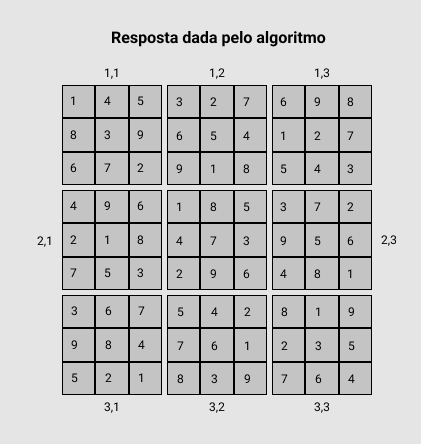
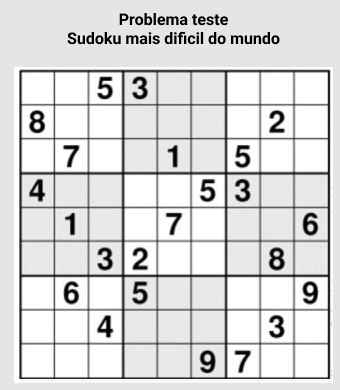
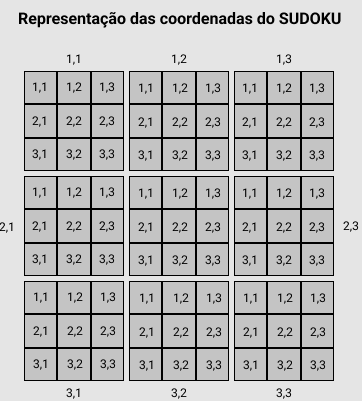